# W207 Final Project Baseline
Authors: John Lee, Nathan Nusaputra, Ryan Sawasaki

## Abstract

For our baseline model, we decided to use three features detailing the square footage of a home due to domain knowledge. These features are: 'GrLivArea', 'TotalBsmtSF','GarageArea'.  We determined that the linear regression model would be our baseline model since it had the highest accuracy out of the three models we tried using. We will evaluate our future performances on this baseline model.  

Key items that will continue to be discussed:  
A) What will be our evaluation function?  Accuracy with ".score" or Root-Mean-Squared-Error?
B) How are we going to standardize the model (if needed)?  StandardScaler? or another package?
C) Which machine learning model to use? Which hyperparameters to tune? Which features to use?

Steps:  
1) Importing Packages  
We imported a bunch of standard libraries (numpy, pandas, seaborn, etc..) as well as a bunch of sci-kit learn libraries for preprocessing, metrics, and models.  

2) Load and Inspect Data  
We loaded our raw data and inspected the data type and a few samples.  


3) Exploratory Data Analysis  
While exploring the data, we found that there are a lot of missing data. 33 features of the actual test data (data without class labels/sales price) had NaN data while only 19 features of the training data had NaN data. After the baseline, we intend to fill these NaN with zeros when appropriate or just drop the features.  


4) Correlations between Sales Price and Different Features  
We graphed the correlation between Sales Price with float/int type data.  We graphed a few features of object type data with Sales Price to show how we anaylzed the data. Those we find most relative to sales price will be used for our final models (not in this baseline). 


5) Baseline Models  
We determined the features that we will use for our baseline model. Did a scatter plot matrix to further dive into the data. We also did a linear model, kneighbors model, and gradient boosting model (all regressions) on these features to general a baseline model for our project.


## Importing Packages

In [2]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import time
import numpy as np
import pandas as pd # to read in csv
import matplotlib.pyplot as plt
import seaborn as sns

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn import ensemble


# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error

# SK-learn libraries for feature extraction from text.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

## Load and Inspect Data

In [3]:
#Read in data

# house price data
train_df_raw = pd.read_csv("data_raw\\train.csv") 
test_df_raw = pd.read_csv("data_raw\\test.csv")

print("Train Shape:", train_df_raw.shape)
print("Test Shape:", test_df_raw.shape)
print(train_df_raw.dtypes.value_counts())
train_df_raw.head(2)

Train Shape: (1460, 81)
Test Shape: (1459, 80)
object     43
int64      35
float64     3
dtype: int64


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


## Exploratory Data Analysis

In [4]:
train_df_raw.describe(include = 'all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [5]:
test_df_raw.describe(include = 'all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
count,1459.000000,1459.000000,1455,1232.000000,1459.000000,1459,107,1459,1459,1457,...,1459.000000,1459.000000,3,290,51,1459.000000,1459.000000,1459.000000,1458,1459
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,1,...,NaN,NaN,2,4,3,NaN,NaN,NaN,9,6
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,NaN,Ex,MnPrv,Shed,NaN,NaN,NaN,WD,Normal
freq,NaN,NaN,1114,NaN,NaN,1453,70,934,1311,1457,...,NaN,NaN,2,172,46,NaN,NaN,NaN,1258,1204
mean,2190.000000,57.378341,NaN,68.580357,9819.161069,NaN,NaN,NaN,NaN,NaN,...,17.064428,1.744345,NaN,NaN,NaN,58.167923,6.104181,2007.769705,NaN,NaN
std,421.321334,42.746880,NaN,22.376841,4955.517327,NaN,NaN,NaN,NaN,NaN,...,56.609763,30.491646,NaN,NaN,NaN,630.806978,2.722432,1.301740,NaN,NaN
min,1461.000000,20.000000,NaN,21.000000,1470.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN
25%,1825.500000,20.000000,NaN,58.000000,7391.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,0.000000,4.000000,2007.000000,NaN,NaN
50%,2190.000000,50.000000,NaN,67.000000,9399.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN
75%,2554.500000,70.000000,NaN,80.000000,11517.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN


**Comment**:
The describe function showed us that we should consider NaN data on many features (see below). Also, it was interesting to see the range of sales price (from 34,900 to 755,000USD) and other feature characteristics.

In [6]:
# Checking Missingness

# TRAINING DATA MISSINGNESS 
df_missing_data = train_df_raw.isnull().sum(axis=0)[train_df_raw.isnull().sum(axis=0) != 0]
# TEST DATA MISSINGNESS
df_missing_data2 = test_df_raw.isnull().sum(axis=0)[test_df_raw.isnull().sum(axis=0) != 0]

# Code to see which sample Id has missing data per feature
feature_train='MasVnrType'
print("Train Feature %s has NaN at following indices:" %feature_train, train_df_raw["Id"][train_df_raw[feature_train].isnull()].unique())
print("")
feature_test='MasVnrType'
print("Test Feature %s has NaN at following indices:" %feature_test, test_df_raw["Id"][test_df_raw[feature_test].isnull()].unique())
print("")

print("Number of train features with missing data:", len(df_missing_data))
#histograms of features with missing data
print("Number of test features with missing data:", len(df_missing_data2))


df_missing1 = pd.DataFrame(df_missing_data, columns=['train_missing_count'])
df_missing2 = pd.DataFrame(df_missing_data2,columns=['test_missing_count'])
df_missing = pd.merge(df_missing1,df_missing2, left_on=df_missing1.index, right_on=df_missing2.index, how='outer')
df_missing.columns=['feature','train_missing_count','test_missing_count']
df_missing=df_missing.sort_values(by=['test_missing_count'], ascending=False)
df_missing

Train Feature MasVnrType has NaN at following indices: [ 235  530  651  937  974  978 1244 1279]

Test Feature MasVnrType has NaN at following indices: [1692 1707 1883 1993 2005 2042 2312 2326 2341 2350 2369 2593 2611 2658
 2687 2863]

Number of train features with missing data: 19
Number of test features with missing data: 33


,feature,train_missing_count,test_missing_count
16,PoolQC,1453.0,1456.0
18,MiscFeature,1406.0,1408.0
1,Alley,1369.0,1352.0
17,Fence,1179.0,1169.0
10,FireplaceQu,690.0,730.0
0,LotFrontage,259.0,227.0
12,GarageYrBlt,81.0,78.0
13,GarageFinish,81.0,78.0
14,GarageQual,81.0,78.0
15,GarageCond,81.0,78.0


**Comment**:  
We found many features with NaN data. We intend to fill these NaN data with our domain knowledge (i.e. for those missing "LotFrontage" for size of front lot data, we would just show 0's instead of NaN).  Otherwise, we will drop the feature themselves (i.e. "PoolQC" for Pool Quality).

In [7]:
# Check for Duplicates?
print("Duplicates in Train Data:",sum(train_df_raw.duplicated()))
print("Duplicates in Test Data:",sum(test_df_raw.duplicated()))

Duplicates in Train Data: 0
Duplicates in Test Data: 0


**Comment**:  
There are no duplicated data.

## Checking Correlations between Sales Price and Other Features

In [8]:
##Number of each Type of data:
# print(train_df_raw.dtypes[(train_df_raw.dtypes != 'float') & (train_df_raw.dtypes !='int64')])
print("Float: %d" %len(train_df_raw.dtypes[(train_df_raw.dtypes == 'float')]))
print("Int: %d" %len(train_df_raw.dtypes[(train_df_raw.dtypes == 'int64')]))
print("Object: %d" %len(train_df_raw.dtypes[(train_df_raw.dtypes == 'object')]))

Float: 3
Int: 35
Object: 43


**Comment**:  
Since the data type range from Float, Int, to Object, we must show correlation differently.  Float and Int type data can be shown with a correlation graph.  Object type data can be shown with boxplot or lmplot.
    

Float & Int Features: 37


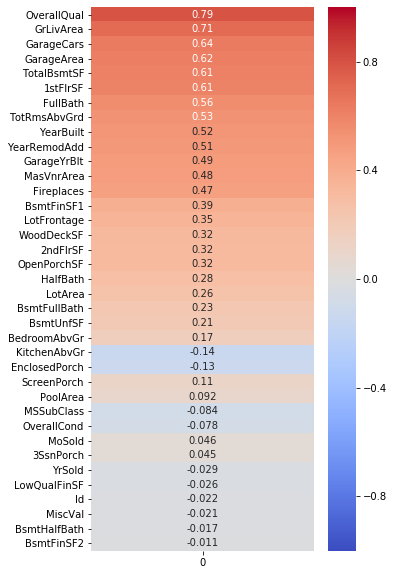

In [9]:
#Correlations between Sales Price & Int/Float Features
correlations = train_df_raw.corrwith(train_df_raw['SalePrice']).iloc[:-1].to_frame()
correlations['abs'] = correlations[0].abs()
sorted_correlations = correlations.sort_values('abs', ascending=False)[0]
fig, ax = plt.subplots(figsize=(5,10))
sns.heatmap(sorted_correlations.to_frame(), cmap='coolwarm', annot=True, vmin=-1, vmax=1);
print("Float & Int Features: %d" %len(correlations))

**Comment**:  
We can see that OverallQual, GrLivArea, GarageCars are the top 3 most correlated features to Sales Price.  

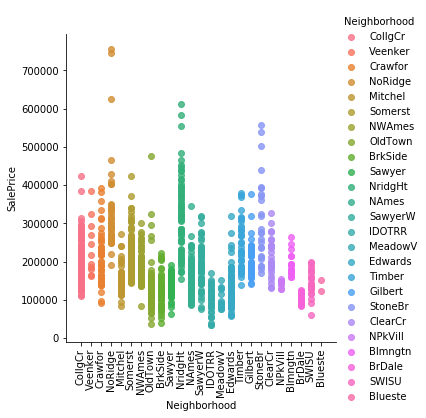

In [10]:
#Correlations between Sales Price & A Few Object Type Features

#Feature: Neighborhood

neighborhood_df = train_df_raw[['Neighborhood','SalePrice']]
neigh_plot = sns.lmplot('Neighborhood', 'SalePrice', data=neighborhood_df, hue='Neighborhood', fit_reg=False)
neigh_plot.set_xticklabels(rotation=90)

**Comment**:  
We see that for certain neighborhoods, the Sales Price is generally higher.

(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
         500000.,  600000.,  700000.,  800000.]),
 <a list of 10 Text yticklabel objects>)

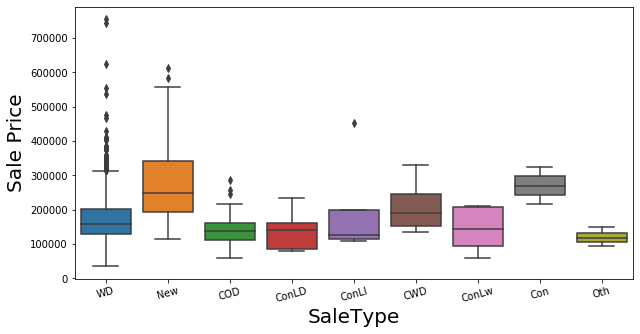

In [11]:
#Correlations between Sales Price & A Few Object Type Features

#Feature: SaleType

feature_object = 'SaleType'           #CHANGE THIS TO UPDATE PLOT
x_feature = train_df_raw.SaleType     #CHANGE THIS TO UPDATE PLOT
plt.figure(figsize=(10,5))
b= sns.boxplot(x_feature, train_df_raw.SalePrice)  #can also do violinplot
b.set_xlabel("%s" %feature_object, fontsize=20)
b.set_ylabel("Sale Price", fontsize=20)
plt.xticks(fontsize=10, rotation=15)
plt.yticks(fontsize=10)

**Comment**:  
We see that for New (just constructed and sold) and Con (15% down payment) Type, the Sales Price is generally higher.

(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
         500000.,  600000.,  700000.,  800000.]),
 <a list of 10 Text yticklabel objects>)

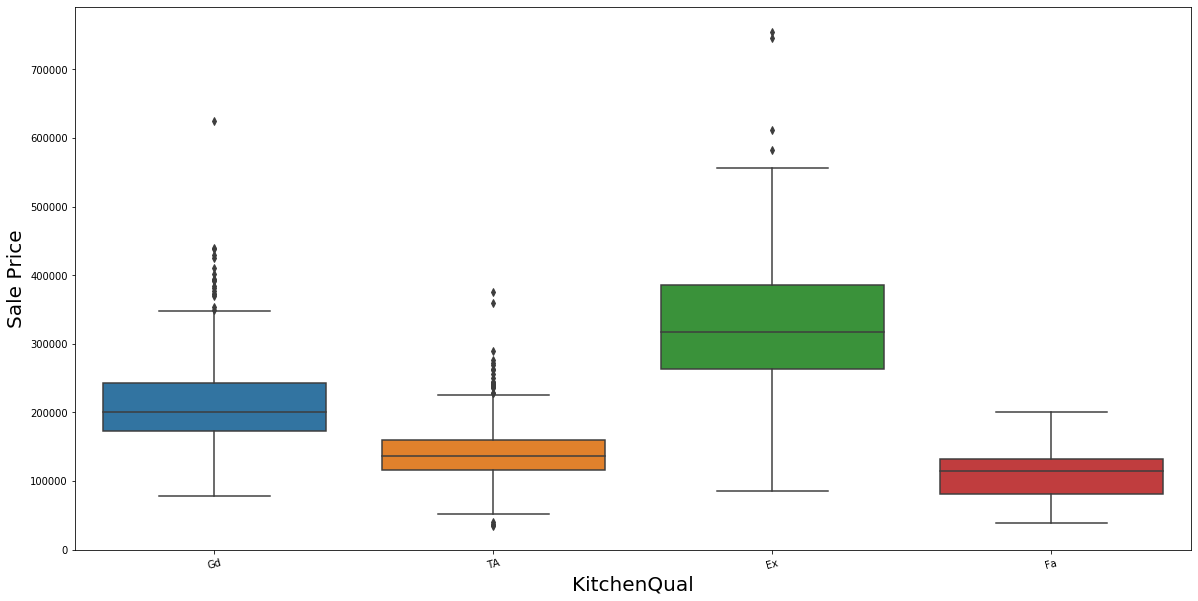

In [12]:
#Correlations between Sales Price & A Few Object Type Features

#Feature: KitchenQual

feature_object = 'KitchenQual'           #CHANGE THIS TO UPDATE PLOT
x_feature = train_df_raw.KitchenQual     #CHANGE THIS TO UPDATE PLOT
plt.figure(figsize=(20,10))
b= sns.boxplot(x_feature, train_df_raw.SalePrice)  #can also do violinplot
b.set_xlabel("%s" %feature_object, fontsize=20)
b.set_ylabel("Sale Price", fontsize=20)
plt.xticks(fontsize=10, rotation=15)
plt.yticks(fontsize=10)

**Comment**:  
We see that for Ex (excellent) kitchen quality, the Sales Price is generally higher.

## Baseline Model(s)

**Comment**:
Using our domain knowledge, we believe the square footage of a house is most indicative of a house's sales price. We can see that the Ground Living Area (GrLivArea), Total Basement Area (TotalBsmtSF), and Garage Area (GarageArea) are 3 of the top 5 most correlated to the Sales Price in the plot above. Therefore, our baseline model will include these three features.

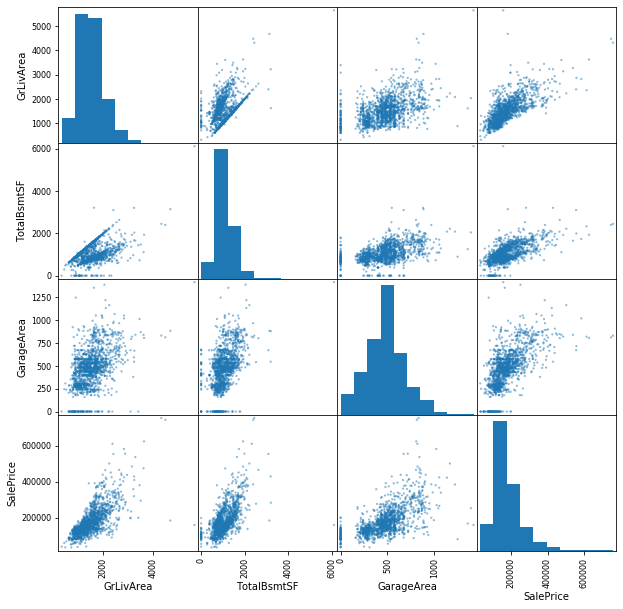

In [13]:
# Scatterplot matrix of baseline model features

baseline_features=['GrLivArea', 'TotalBsmtSF','GarageArea','SalePrice']
train_df_baseline=train_df_raw[baseline_features]
train_df_baseline.head()
ax = pd.plotting.scatter_matrix(train_df_baseline,
                                figsize=(10,10),
                                marker='o', s=5)
for ax in ax.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 10, rotation = 0)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 10, rotation = 90)

**Comment**:  
Scatterplot matrix shows trends indicating that sales price goes up when ground living area, basement area, and garage area goes up.

In [14]:
# Format Data for Modeling

#Standardize Data
scaler=StandardScaler()
train_df_std=pd.DataFrame(scaler.fit_transform(train_df_baseline))
X = train_df_std.iloc[:,:-1]
y = train_df_std.iloc[:,-1]
train_data_bl_std, dev_data_bl_std, train_labels_bl_std, dev_labels_bl_std = train_test_split(X,y, test_size=0.2) 
print("Standardized Train Data Shape:", train_data_bl_std.shape)
print("Standardized Dev Data Shape:", dev_data_bl_std.shape)

#Did not Standardize Data
X = train_df_baseline.iloc[:,:-1]
y = train_df_baseline.iloc[:,-1]
train_data_bl, dev_data_bl, train_labels_bl, dev_labels_bl = train_test_split(X,y, test_size=0.2)  
print("UnStandardized Train Data Shape:", train_data_bl.shape)
print("UnStandardized Dev Data Shape:", dev_data_bl.shape)

Standardized Train Data Shape: (1168, 3)
Standardized Dev Data Shape: (292, 3)
UnStandardized Train Data Shape: (1168, 3)
UnStandardized Dev Data Shape: (292, 3)


**Comment**:
We started work with non-standardized data because we were only comparing square footage features in our baseline. However, we will investigate standardized data further after this baseline model

Estimated function: y = -20418.29 + 67.47*x_1 + 46.55*x_2 + 104.50*x_3
R^2: 0.643978455617705
Accuracy: 0.7251224998312179
Root Mean Squared Error: 43316.40702357576


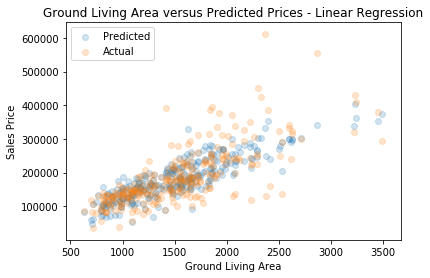

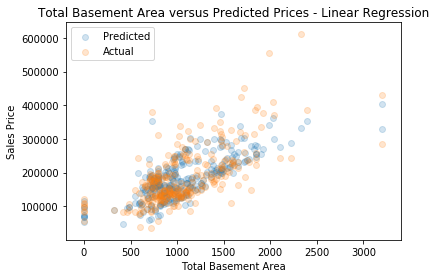

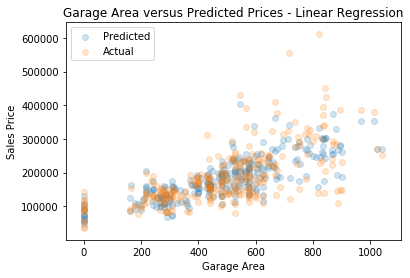

In [15]:
#Linear regression model without Standardized Data

lr = LinearRegression(fit_intercept=True)
lr.fit(train_data_bl, train_labels_bl)                 #fit model
print ("Estimated function: y = %.2f + %.2f*x_1 + %.2f*x_2 + %.2f*x_3" %(lr.intercept_, lr.coef_[0], lr.coef_[1], lr.coef_[2]))
prediction = lr.predict(dev_data_bl)    #predict
print("R^2:",lr.score(train_data_bl,train_labels_bl))    #Finding R^2
print("Accuracy:",lr.score(dev_data_bl,dev_labels_bl))    #Finding accuracy of dev data
print("Root Mean Squared Error:", mean_squared_error(dev_labels_bl, prediction, squared=False))

fig2=plt.figure()
fig2=plt.title('Ground Living Area versus Predicted Prices - Linear Regression')
fig2=plt.xlabel('Ground Living Area')
fig2=plt.ylabel('Sales Price')
fig2=plt.scatter(dev_data_bl['GrLivArea'],prediction, alpha=0.2)
fig2=plt.scatter(dev_data_bl['GrLivArea'],dev_labels_bl, alpha=0.2)
fig2=plt.legend(['Predicted', 'Actual'],loc='upper left')

fig3=plt.figure()
fig3=plt.title('Total Basement Area versus Predicted Prices - Linear Regression')
fig3=plt.xlabel('Total Basement Area')
fig3=plt.ylabel('Sales Price')
fig3=plt.scatter(dev_data_bl['TotalBsmtSF'],prediction, alpha=0.2)
fig3=plt.scatter(dev_data_bl['TotalBsmtSF'],dev_labels_bl, alpha=0.2)
fig3=plt.legend(['Predicted', 'Actual'],loc='upper left')

fig4=plt.figure()
fig4=plt.title('Garage Area versus Predicted Prices - Linear Regression')
fig4=plt.xlabel('Garage Area')
fig4=plt.ylabel('Sales Price')
fig4=plt.scatter(dev_data_bl['GarageArea'],prediction, alpha=0.2)
fig4=plt.scatter(dev_data_bl['GarageArea'],dev_labels_bl, alpha=0.2)
fig4=plt.legend(['Predicted', 'Actual'],loc='upper left')

**Comment**:  
It appears that the linear regression model without standardized data performed the best in terms of accuracy.

In [16]:
#Linear regression model with Standardized Data

lr = LinearRegression(fit_intercept=True)
lr.fit(train_data_bl_std, train_labels_bl_std)                 #fit model
print ("Estimated function: y = %.2f + %.2f*x_1 + %.2f*x_2 + %.2f*x_3" %(lr.intercept_, lr.coef_[0], lr.coef_[1], lr.coef_[2]))
prediction = lr.predict(dev_data_bl_std)    #predict
print("R^2:",lr.score(train_data_bl_std,train_labels_bl_std))    #Finding R^2
print("Accuracy:",lr.score(dev_data_bl_std,dev_labels_bl_std))    #Finding accuracy of dev data
print("Root Mean Squared Error:", mean_squared_error(dev_labels_bl_std, prediction, squared=False))

Estimated function: y = -0.00 + 0.47*x_1 + 0.33*x_2 + 0.27*x_3
R^2: 0.7114761818985047
Accuracy: 0.46544839816707706
Root Mean Squared Error: 0.7650666138128865


**Comment**:  
It appears that the linear regression model with standardized data performed worse but the RMSE is much lower.

In [17]:
#K-Nearest Neighbors Regressor Model

knn = KNeighborsRegressor(n_neighbors=1)
knn.fit(train_data_bl, train_labels_bl)  
prediction = knn.predict(dev_data_bl)
print("R^2:",knn.score(train_data_bl,train_labels_bl))    #Finding R^2
print("Accuracy:",knn.score(dev_data_bl,dev_labels_bl))    #Finding accuracy of dev data
print("Root Mean Squared Error:", mean_squared_error(dev_labels_bl, prediction, squared=False))


R^2: 0.9983157512681696
Accuracy: 0.4693759196171493
Root Mean Squared Error: 60183.34290381989


**Comment**:  
We wanted to try out k Neighbors to see its performance. It appears that the k neighbors regression model with non-standardized data had lower accuracy than linear regression.

In [18]:
#Gradient Boosting Regressor Model

train_data_bl = train_data_bl[['GrLivArea', 'TotalBsmtSF','GarageArea']]
dev_data_bl = dev_data_bl[['GrLivArea','TotalBsmtSF', 'GarageArea']]
gradbst = ensemble.GradientBoostingRegressor(n_estimators = 10, max_depth=5, min_samples_split=2, learning_rate=0.1,
                                            loss='ls')
gradbst.fit(train_data_bl, train_labels_bl)
prediction = gradbst.predict(dev_data_bl)
gradbst.score(dev_data_bl,dev_labels_bl)

print("R^2:",gradbst.score(train_data_bl,train_labels_bl))    #Finding R^2
print("Accuracy:",gradbst.score(dev_data_bl,dev_labels_bl))    #Finding accuracy of dev data
print("Root Mean Squared Error:", mean_squared_error(dev_labels_bl, prediction, squared=False))


R^2: 0.7330373829107583
Accuracy: 0.6643609973207428
Root Mean Squared Error: 47865.107719696854


**Comment**:  
We wanted to try out gradient boosting regressor with nonstandardized data to also see its performance. It appears to have relatively high accuracy compared with linear regression and k-nearest neighbors regression.   


## Data Formatting

After EDA, we have determined several features that may be dropped due to large amounts of missing/NaN data. Other features with missing/NaN data will be converted to None or 0 value so that the feature may still be used in our model.  

Categorical data will be separated to ordinal and nominal. Ordinal data will be converted to integers that include the ordering of the data. Nominal data will be converted to dummy variables.  

Finally, we will standard scale all of the independent features while leaving the dependent feature (saleprice) alone.

In [19]:
# ORIGINAL DATA SIZE FOR REFERENCE
print("Train Shape:", train_df_raw.shape)
print("Test Shape:", test_df_raw.shape)

Train Shape: (1460, 81)
Test Shape: (1459, 80)


In [20]:
# DROPPING TOP 5 MOST MISSING/NAN FEATURES:
top_5_missing = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']
train_df_raw2 = train_df_raw.drop(top_5_missing,axis=1)
test_df_raw2 = test_df_raw.drop(top_5_missing,axis=1)
print("Train Data Dropped Top 5 Missing/NaN Columns Shape:", train_df_raw2.shape)
print("Test Data Dropped Top 5 Missing/NaN Columns Shape:", test_df_raw2.shape)

Train Data Dropped Top 5 Missing/NaN Columns Shape: (1460, 76)
Test Data Dropped Top 5 Missing/NaN Columns Shape: (1459, 75)


In [21]:
# CONVERTING NAN DATA TO 0 OR NONE

#Numerical Data to 0
numerical_NaN = ['LotFrontage','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
                 'TotalBsmtSF','BsmtFullBath','BsmtHalfBath','GarageYrBlt','GarageCars',
                 'GarageArea']
train_df_raw2[numerical_NaN]=train_df_raw2[numerical_NaN].fillna(0)
test_df_raw2[numerical_NaN]=test_df_raw2[numerical_NaN].fillna(0)

#Categorical Data to None
categorical_NaN = ['MSZoning','Utilities','Exterior1st','Exterior2nd','MasVnrType',
                   'SaleType','Electrical','GarageType','Functional','BsmtQual',
                   'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
                   'KitchenQual','GarageFinish','GarageQual','GarageCond']
train_df_raw2[categorical_NaN]=train_df_raw2[categorical_NaN].fillna('None')
test_df_raw2[categorical_NaN]=test_df_raw2[categorical_NaN].fillna('None')

# Check if it worked by checking Missingness
dftrain_missing = train_df_raw2.isnull().sum(axis=0)[train_df_raw2.isnull().sum(axis=0) != 0] # TRAINING DATA MISSINGNESS 
dftest_missing = test_df_raw2.isnull().sum(axis=0)[test_df_raw2.isnull().sum(axis=0) != 0] # TEST DATA MISSINGNESS
print("Number of train features (after replacing NaN data) with missing data:", len(dftrain_missing))
print("Number of test features (after replacing NaN data) with missing data:", len(dftest_missing))

Number of train features (after replacing NaN data) with missing data: 0
Number of test features (after replacing NaN data) with missing data: 0


In [22]:
# CONVERT ORDINAL DATA TO INTEGERS TO INCLUDE ORDERING OF DATA

# 1 is best, largest number is worse, use mapping
train_df_raw2['Functional']=train_df_raw2['Functional'].map({'Typ':1,'Min1':2,'Min2':3,'Mod':4,'Maj1':5,'Maj2':6,'Sev':7,'Sal':8,'None':9})
train_df_raw2['BsmtQual']=train_df_raw2['BsmtQual'].map({'Ex':1,'Gd':2,'TA':3,'Fa':4,'Po':5,'NA':6,'None':6})
train_df_raw2['BsmtCond']=train_df_raw2['BsmtCond'].map({'Ex':1,'Gd':2,'TA':3,'Fa':4,'Po':5,'NA':6,'None':6})
train_df_raw2['BsmtExposure']=train_df_raw2['BsmtExposure'].map({'Gd':1,'Av':2,'Mn':3,'No':4,'NA':5,'None':5})
train_df_raw2['BsmtFinType1']=train_df_raw2['BsmtFinType1'].map({'GLQ':1,'ALQ':2,'BLQ':3,'Rec':4,'LwQ':5,'Unf':6,'NA':7,'None':7})
train_df_raw2['BsmtFinType2']=train_df_raw2['BsmtFinType2'].map({'GLQ':1,'ALQ':2,'BLQ':3,'Rec':4,'LwQ':5,'Unf':6,'NA':7,'None':7})
train_df_raw2['KitchenQual']=train_df_raw2['KitchenQual'].map({'Ex':1,'Gd':2,'TA':3,'Fa':4,'Po':5,'None':6})
train_df_raw2['GarageFinish']=train_df_raw2['GarageFinish'].map({'Fin':1,'RFn':2,'Unf':3,'NA':4,'None':4})
train_df_raw2['GarageQual']=train_df_raw2['GarageQual'].map({'Ex':1,'Gd':2,'TA':3,'Fa':4,'Po':5,'NA':6,'None':6})
train_df_raw2['GarageCond']=train_df_raw2['GarageCond'].map({'Ex':1,'Gd':2,'TA':3,'Fa':4,'Po':5,'NA':6,'None':6})

test_df_raw2['Functional']=test_df_raw2['Functional'].map({'Typ':1,'Min1':2,'Min2':3,'Mod':4,'Maj1':5,'Maj2':6,'Sev':7,'Sal':8,'None':9})
test_df_raw2['BsmtQual']=test_df_raw2['BsmtQual'].map({'Ex':1,'Gd':2,'TA':3,'Fa':4,'Po':5,'NA':6,'None':6})
test_df_raw2['BsmtCond']=test_df_raw2['BsmtCond'].map({'Ex':1,'Gd':2,'TA':3,'Fa':4,'Po':5,'NA':6,'None':6})
test_df_raw2['BsmtExposure']=test_df_raw2['BsmtExposure'].map({'Gd':1,'Av':2,'Mn':3,'No':4,'NA':5,'None':5})
test_df_raw2['BsmtFinType1']=test_df_raw2['BsmtFinType1'].map({'GLQ':1,'ALQ':2,'BLQ':3,'Rec':4,'LwQ':5,'Unf':6,'NA':7,'None':7})
test_df_raw2['BsmtFinType2']=test_df_raw2['BsmtFinType2'].map({'GLQ':1,'ALQ':2,'BLQ':3,'Rec':4,'LwQ':5,'Unf':6,'NA':7,'None':7})
test_df_raw2['KitchenQual']=test_df_raw2['KitchenQual'].map({'Ex':1,'Gd':2,'TA':3,'Fa':4,'Po':5,'None':6})
test_df_raw2['GarageFinish']=test_df_raw2['GarageFinish'].map({'Fin':1,'RFn':2,'Unf':3,'NA':4,'None':4})
test_df_raw2['GarageQual']=test_df_raw2['GarageQual'].map({'Ex':1,'Gd':2,'TA':3,'Fa':4,'Po':5,'NA':6,'None':6})
test_df_raw2['GarageCond']=test_df_raw2['GarageCond'].map({'Ex':1,'Gd':2,'TA':3,'Fa':4,'Po':5,'NA':6,'None':6})


In [23]:
# CONVERT NOMINAL DATA TO DUMMIES

""" Running get_dummies on train and test data separately would not work because some training data could be
missing in test data and vice versa.  Therefore, we will combine all data and get_dummies. 
Reference: https://stackoverflow.com/questions/56738267/how-can-i-align-pandas-get-dummies-across-training-validation-testing 
"""
all_data = pd.concat([train_df_raw2, test_df_raw2]) 
all_data_dummy = pd.get_dummies(all_data)
print("all_data shape:", all_data_dummy.shape)

#We cannot split the data back to train, dev, and test yet, because standardizing features has the same issue

all_data shape: (2919, 241)


C:\Users\Games\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  import sys


In [24]:
# STANDARD SCALE THE DATA

#First pull out SalePrice column since we won't be standard scaling the dependent feature
X=all_data_dummy.drop(['SalePrice'],axis=1)
Y=all_data_dummy['SalePrice']
print("Shape of all_data (dummies) X:", X.shape)
print("Shape of all_data (dummies) Y:", Y.shape)
#X.head(1)

#Standard Scale!
scaler=StandardScaler()
X_std=pd.DataFrame(scaler.fit_transform(X))      #only standard scaled independent features
print("Shape of standardized X:", X_std.shape)
#X_std.head(1)

#Add the Sale Price feature column back into all_data
all_data_std = X_std
all_data_std = all_data_std.assign(SalePrice = list(Y))  #adds SalePrice data back in
print("Shape of standardized X plus SalePrice column:", all_data_std.shape)

Shape of all_data (dummies) X: (2919, 240)
Shape of all_data (dummies) Y: (2919,)
Shape of standardized X: (2919, 240)
Shape of standardized X plus SalePrice column: (2919, 241)


In [25]:
X.head(1)

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,...,SaleType_ConLw,SaleType_New,SaleType_None,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa,Utilities_None
0,856,854,0,3,3,4,706.0,0.0,1,6,...,0,0,0,0,1,0,1,1,0,0


In [26]:
X_std.head(1)

,0,1,2,3,4,5,6,7,8,9,...,230,231,232,233,234,235,236,237,238,239
0,-0.773861,1.207379,-0.103331,0.169927,-0.141836,0.583117,0.581145,-0.293025,-1.163184,0.286617,...,-0.052423,-0.298629,-0.018512,-0.049029,0.395018,-0.064249,0.064249,0.032075,-0.018512,-0.026185


In [27]:
all_data_std.head(1)

,0,1,2,3,4,5,6,7,8,9,...,231,232,233,234,235,236,237,238,239,SalePrice
0,-0.773861,1.207379,-0.103331,0.169927,-0.141836,0.583117,0.581145,-0.293025,-1.163184,0.286617,...,-0.298629,-0.018512,-0.049029,0.395018,-0.064249,0.064249,0.032075,-0.018512,-0.026185,208500.0


In [53]:
# SPLIT ALL_DATA TO TRAIN/TEST. THEN SPLIT TRAIN TO TEST/DEV.

# Split all_data to Train/Test
train_raw2, test_raw2 = train_test_split(all_data_std, test_size=1459/2919, shuffle=False)
test_raw2 = test_raw2.drop(['SalePrice'],axis=1)  #original test_data did not have SalePrice feature
print(train_raw2.shape)
print(test_raw2.shape)
test_data = test_raw2  #renaming test data

# Split Train data to Test/Dev
x = train_raw2.iloc[:,:-1]
y = train_raw2.iloc[:,-1]
train_data, dev_data, train_labels, dev_labels = train_test_split(x,y, test_size=0.2)  #20% dev, 80% test
print("Standardized Train Data Shape:", train_data.shape)
print("Standardized Dev Data Shape:", dev_data.shape)
print("Train Label Shape:", train_labels.shape)
print("Dev Label Shape:", dev_labels.shape)

(1460, 241)
(1459, 240)
Standardized Train Data Shape: (1168, 240)
Standardized Dev Data Shape: (292, 240)
Train Label Shape: (1168,)
Dev Label Shape: (292,)


In [54]:
# SUMMARY OF DATA

# "train_data"    = Training Data
# "train_labels"  = Training Labels
# "dev_data"      = Development Data (to check accuracy of Machine Learning models)
# "dev_labels"    = Development Labels (to check accuracy of Machine Learning models)
# "test_data"     = Test Data (to predict housing price for submitting to Kaggle)


In [55]:
# put the columns back into train data
for i in range(len(train_data.columns)):
    train_data = train_data.rename(columns={i: X.columns[i]})

for i in range(len(dev_data.columns)):
    dev_data = dev_data.rename(columns={i: X.columns[i]})
        

In [56]:
train_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,...,SaleType_ConLw,SaleType_New,SaleType_None,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa,Utilities_None
1218,-1.242896,-0.225099,-0.103331,-1.045801,5.076906,1.517834,-0.968705,-0.293025,1.675724,1.333719,...,-0.052423,-0.298629,-0.018512,-0.049029,0.395018,-0.064249,0.064249,0.032075,-0.018512,-0.026185
921,0.286566,1.380022,-0.103331,1.385655,-0.141836,0.583117,1.410952,-0.293025,-0.690033,0.286617,...,-0.052423,-0.298629,-0.018512,-0.049029,0.395018,-0.064249,0.064249,0.032075,-0.018512,-0.026185
769,1.352091,2.922152,-0.103331,1.385655,-0.141836,-2.221033,2.139776,-0.293025,-0.690033,0.286617,...,-0.052423,-0.298629,-0.018512,-0.049029,0.395018,-0.064249,0.064249,0.032075,-0.018512,-0.026185
4,-0.037170,1.671651,-0.103331,1.385655,-0.141836,-1.286316,0.469187,-0.293025,-1.163184,0.286617,...,-0.052423,-0.298629,-0.018512,-0.049029,0.395018,-0.064249,0.064249,0.032075,-0.018512,-0.026185
166,1.803282,-0.785025,-0.103331,-1.045801,-0.141836,0.583117,-0.136703,4.247320,0.729421,-2.854689,...,-0.052423,-0.298629,-0.018512,-0.049029,-2.531527,-0.064249,0.064249,0.032075,-0.018512,-0.026185


In [63]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_log_error


train_data_mod = train_data[['GrLivArea', 'TotalBsmtSF','GarageArea', '1stFlrSF']]
dev_data_mod = dev_data[['GrLivArea','TotalBsmtSF', 'GarageArea', '1stFlrSF']]
gradbst = ensemble.GradientBoostingRegressor(min_samples_split=2,
                                            loss='ls')


gradbst_param = dict(n_estimators=range(1,200), max_depth=range(1,50), learning_rate= np.linspace(0,1,11))

clf = RandomizedSearchCV(gradbst, gradbst_param, random_state=0, scoring='neg_mean_squared_log_error')
search = clf.fit(train_data_mod, train_labels)
search.best_params_



{'n_estimators': 150, 'max_depth': 9, 'learning_rate': 0.2}

In [65]:

gradbst_max = ensemble.GradientBoostingRegressor(n_estimators = 150, max_depth = 9, min_samples_split=2, learning_rate=.2,
                                                 loss='ls')
gradbst_max.fit(train_data_mod, train_labels)
prediction_max = gradbst_max.predict(dev_data_mod)
gradbst_max.score(dev_data_mod,dev_labels)

print("R^2:",gradbst_max.score(train_data_mod,train_labels))    #Finding R^2
print("Accuracy:",gradbst_max.score(dev_data_mod,dev_labels))    #Finding accuracy of dev data
print("Root Mean Squared Error:", mean_squared_error(dev_labels, prediction_max, squared=False))
print("Root Mean Squared Error:", mean_squared_log_error(dev_labels, prediction_max))

R^2: 0.9995489238489753
Accuracy: 0.6957679342275523
Root Mean Squared Error: 44309.036324375855
Root Mean Squared Error: 0.04847041032365246
